In [ ]:
import numpy as np
import pandas as pd
import math


**1. What is the minimizer and minimum function value of $ f(x) = f(x1, x2) = (a+1- x_1)^2 +b(x_2 - x_1^2)^2$?,
Where 10a is the last digit of your Roll Number and b is 60. Use these values
a, b for other problems that follows.**

My roll no is 23n0462. Therefore a=0.2 and b = 60. So the equation becomes
$ f(x) = f(x1, x2) = (1.2- x_1)^2 +60(x_2 - x_1^2)^2$

In [ ]:
def f(x):
    return (1.2 - x[0])**2 + 60 * (x[1] - x[0]**2)**2

def grad_f(x):
    return np.array([-2 * (1.2 - x[0]) - 240 * x[0] * (x[1] - x[0]**2), 120 * (x[1] - x[0]**2)])

def gradient_descent_constant_step(f, grad_f, x0, tolerance, step_size):
    x = x0
    k = 0
    while np.linalg.norm(grad_f(x)) > tolerance:
        x = x - step_size * grad_f(x)
        k += 1
    else:
       pass
    return x, f(x), k


In [ ]:
# Initial point, tolerance, and step size
x0 = np.array([-1.5, 1.5])
tolerance = 1e-1
step_size = 0.001

# Run gradient descent
minimizer, min_function_value, iterations = gradient_descent_constant_step(f, grad_f, x0, tolerance, step_size)

# Print results
print(f"Minimizer: {minimizer}")
print(f"Minimum function value: {min_function_value}")
print(f"Iterations: {iterations}")


Minimizer: [1.08091495 1.16762044]
Minimum function value: 0.014215603318147021
Iterations: 5036


**2. With the starting point $x_0 = (−1.5, 1.5)$and η = 0.001, we aim to analyze the behavior of the algorithm 2 for
different tolerance values. We set $τ = 10^-p $ where p = 1, 2, . . . , 13. For each τ , record the final minimizer,
objective function value at termination, and the number of iterations required for convergence in a tabular form.
Generate a plot, illustrating the relationship between the number of iterations and τ values. Comment on the
observations. Comment about the minimizers and objective function values obtained for different choices of the
tolerance values.**

      Tolerance                                 Minimizer  \
0  1.000000e-01  [1.0809149523055963, 1.1676204446860452]   
1  1.000000e-02  [1.1871208124022432, 1.4091790068048677]   
2  1.000000e-03  [1.1987015641974486, 1.4368777482883817]   
3  1.000000e-04  [1.1998700283994304, 1.4396873156497174]   
4  1.000000e-05    [1.199987001378713, 1.439968726534365]   
5  1.000000e-06   [1.1999987001817025, 1.439996872743737]   
6  1.000000e-07    [1.199999870020613, 1.439999687280099]   

   Objective Function Value  Iterations  
0                  3.682945        5036  
1                  3.286532       12073  
2                  3.244676       19788  
3                  3.240468       27577  
4                  3.240047       35374  
5                  3.240005       43172  
6                  3.240000       50970  


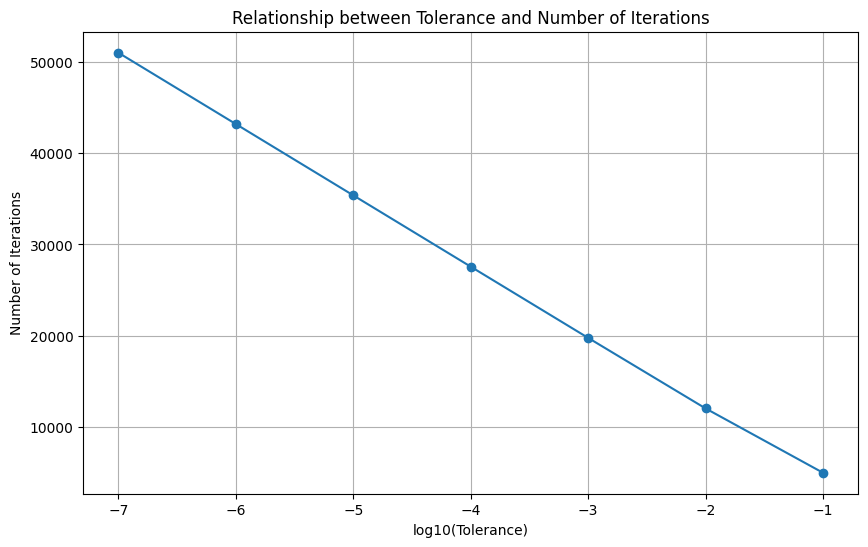

In [ ]:
import matplotlib.pyplot as plt

x0 = np.array([-1.5, 1.5])

# Tolerance values
tolerances = [10**(-p) for p in range(1,8)]

# Results table
results = []

for tol in tolerances:
    minimizer, min_value, iterations = gradient_descent_constant_step(f, grad_f, x0, tol,step_size = 0.001)
    results.append([tol, minimizer, min_value, iterations])

results_df = pd.DataFrame(results, columns=["Tolerance", "Minimizer", "Objective Function Value", "Iterations"])

# Print results
print(results_df)

# Generate plot
plt.figure(figsize=(10, 6))
plt.plot(np.log10(tolerances), results_df["Iterations"], marker='o')
plt.title("Relationship between Tolerance and Number of Iterations")
plt.xlabel("log10(Tolerance)")
plt.ylabel("Number of Iterations")
plt.grid(True)
plt.show()


**3. Plot the level sets of the function in (1) and also plot the trajectory of the optimization on the same plot and
report your observations. ”In optimization, a trajectory refers to the path or sequence of points that a numerical
optimization algorithm traverses while iteratively updating the solution in search of an optimal point”.**

**4. What may be the shortcomings of this algorithm and suggests a possible solution to deal with it ?**

The gradient descent algorithm, while powerful and widely used, has several shortcomings that can affect its performance in certain scenarios. Some of these shortcomings include:

**Sensitivity to Learning Rate**: The choice of learning rate can significantly impact the convergence of gradient descent. If the learning rate is too small, the algorithm may take a long time to converge, while if it's too large, the algorithm may oscillate or diverge.

**Local Minima**: Gradient descent can get stuck in local minima, especially in non-convex functions where multiple minima exist
**Sensitivity to Initialization**: The convergence of gradient descent can depend on the initial point from which the optimization starts. Poor initializations can lead to slow convergence or convergence to suboptimal solutions.



To address these shortcomings, several variations and improvements to gradient descent have been proposed:

**Learning Rate Schedules**: Instead of using a fixed learning rate, adaptive learning rate methods such as AdaGrad, RMSProp, or Adam adjust the learning rate during training based on the history of gradients, which can improve convergence speed and stability.

**Momentum**: Adding momentum to gradient descent can help accelerate convergence, especially in the presence of plateaus or flat regions. Momentum methods like Nesterov Accelerated Gradient (NAG) and Momentum SGD use a moving average of past gradients to update the parameters.

**Initialization Strategies**: Using smart initialization strategies, such as Xavier or He initialization for neural networks, can help mitigate the sensitivity of gradient descent to initialization.

**Second-Order Methods**: Methods like Newton's method or quasi-Newton methods use second-order information (Hessian matrix) to update parameters, which can help overcome some of the limitations of first-order methods like gradient descent.

**Mini-Batch Gradient Descent**: Instead of computing gradients using the entire dataset (batch gradient descent) or a single data point (stochastic gradient descent), mini-batch gradient descent computes gradients using a small subset of the data, striking a balance between accuracy and computational efficiency.

By considering these improvements and selecting the appropriate variant of gradient descent based on the specific characteristics of the optimization problem, it is possible to mitigate many of the shortcomings associated with basic gradient descent.

[1.19999987 1.43999969]
